# A Decision Tree Analysis on NYC poverty Status

### Importing the data and necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from IPython.display import display
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm
pd.options.display.max_columns = None ### shows all columns
error_bad_lines = False
df=pd.read_csv('NYCgov_Poverty_Measure_Data__2016_.csv')


C:\Users\Abhishek Nimmakayala\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Exploratory Data Analysis


### Yearly Income in poverty and non povery groups

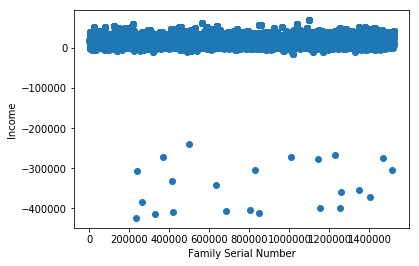

In [2]:
poverty=df[df.NYCgov_Pov_Stat==1]
not_poverty=df[df.NYCgov_Pov_Stat==2]
plt.scatter(poverty.SERIALNO,poverty.NYCgov_Income)
plt.ylabel('Income')
plt.xlabel('Family Serial Number')
plt.show()

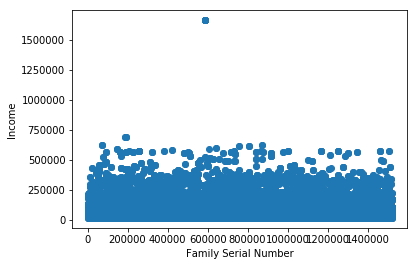

In [3]:
plt.scatter(not_poverty.SERIALNO,not_poverty.NYCgov_Income)
plt.ylabel('Income')
plt.xlabel('Family Serial Number')
plt.show()

### Population in Non Poverty vs Population in Poverty

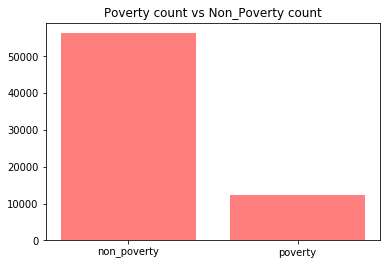

The count of poverty is 12409, The count of Non_poverty is 56235
The percentage of non_poverty is 22


In [4]:
indx=['poverty','non_poverty']
bar=[len(poverty),len(not_poverty)]

plt.bar(indx, bar, alpha=0.5,color='r') ## alpha gives opacity
plt.title('Poverty count vs Non_Poverty count')
plt.show()

print(f"The count of poverty is {len(poverty)}, The count of Non_poverty is {len(not_poverty)}")
print(f"The percentage of non_poverty is {round(len(poverty)/len(not_poverty)*100)}")


### Poverty population Vs non poverty population in different towns of New York

In [5]:
split_pov=poverty.groupby('Boro').Boro.count()
index_pov=split_pov.index
values_pov=split_pov.values

town_label=[1,2,3,4,5]
town_name=['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
town_dict=dict(zip(town_label,town_name))

print(town_dict)
print(split_pov)

split_npov=not_poverty.groupby('Boro').Boro.count()
index_npov=split_npov.index
values_npov=split_npov.values

print(split_npov)




{1: 'Bronx', 2: 'Brooklyn', 3: 'Manhattan', 4: 'Queens', 5: 'Staten Island'}
Boro
1    2368
2    4558
3    1184
4    3748
5     551
Name: Boro, dtype: int64
Boro
1     7321
2    20117
3     7616
4    17721
5     3460
Name: Boro, dtype: int64


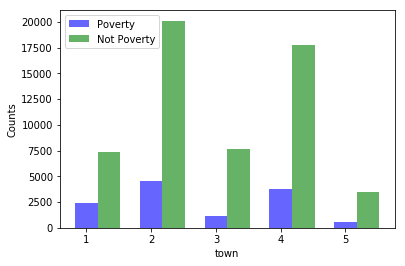

{1: 'Bronx', 2: 'Brooklyn', 3: 'Manhattan', 4: 'Queens', 5: 'Staten Island'}


In [6]:
fig, ax= plt.subplots()
bar_width = 0.35
opacity = 0.6

town_label=[1,2,3,4,5]
town_name=['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
town_dict=dict(zip(town_label,town_name))
    
rects1 = plt.bar(split_pov.index, split_pov.values, bar_width, 
alpha=opacity,
color='b',
label='Poverty')
 
rects2 = plt.bar(split_pov.index + bar_width,split_npov.values , bar_width,
alpha=opacity,
color='g',
label='Not Poverty')
plt.xlabel('town')
plt.ylabel('Counts')
plt.legend()
plt.show()
print(town_dict)

# Decision Tree prior to preprocessing (The 5 line of code :P)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.externals.six import StringIO
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from IPython.display import Image
import pydotplus
from sklearn import tree

In [8]:
rawdf = df
rawdf = rawdf.dropna()
raw_x=rawdf.drop('NYCgov_Pov_Stat',axis=1)  ### Line 1
raw_y=rawdf.NYCgov_Pov_Stat  ### Line 2



In [9]:
raw_xTrain, raw_xTest, raw_yTrain, raw_yTest = train_test_split(raw_x, raw_y, test_size = 0.2, random_state = 0) ## Line 3
print(raw_xTrain.shape,raw_yTrain.shape,raw_xTest.shape,raw_yTest.shape)

(12013, 78) (12013,) (3004, 78) (3004,)


In [10]:
rawclf = DecisionTreeClassifier()
rawclf.fit(raw_xTrain,raw_yTrain) ### line 4


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
from sklearn.metrics import confusion_matrix
raw_yPred=rawclf.predict(raw_xTest)  ### Line 5
confusion_matrix(raw_yTest, raw_yPred, labels=None, sample_weight=None)

array([[ 445,    0],
       [   0, 2559]], dtype=int64)

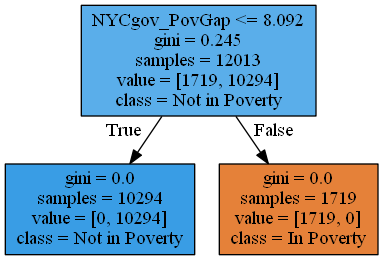

In [12]:
from io import StringIO
dictionary = {1:'In Poverty',2:"Not in Poverty"}
dot_data1 = StringIO()
tree.export_graphviz(rawclf, out_file=dot_data1,feature_names=list(raw_x.columns),
                     class_names=np.vectorize(dictionary.get)(rawclf.classes_),filled=True)
graph1 = pydotplus.graph_from_dot_data(dot_data1.getvalue())
Image(graph1.create_png())

# Handling missing data

[('ENG', 38015), ('ESR', 12198), ('EducAttain', 2240), ('JWTR', 36009), ('LANX', 3738), ('MSP', 11419), ('Off_Threshold', 2), ('SCHL', 2241), ('WKW', 32406)]


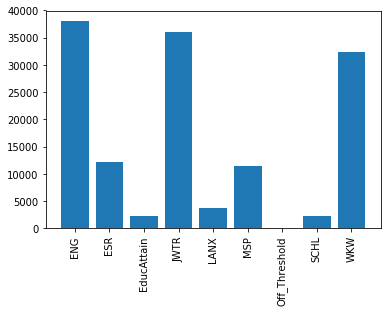

In [13]:
### count of missing data in each column and bar graph
df.columns
missing_values=[]
missing_cols=[]
for i in df.columns:
    if (len(df) - df[i].count()>0):
        missing_values.append(len(df) - df[i].count())
        missing_cols.append(i)
k=dict(zip(missing_cols,missing_values))
print(sorted(k.items()))
plt.bar(missing_cols,missing_values)
plt.xticks(missing_cols, missing_cols, rotation='vertical')
plt.show()

### Number of values in missing columns before imputation 

In [14]:
### Understsnding missing values
print(df.groupby('ENG').ENG.count())
print(df.groupby('ESR').ESR.count())
print(df.groupby('EducAttain').EducAttain.count())
print(df.groupby('JWTR').JWTR.count())
print(df.groupby('LANX').LANX.count())
print(df.groupby('MSP').MSP.count())
print(df.groupby('Off_Threshold').Off_Threshold.count())
print(df.groupby('SCHL').SCHL.count())
print(df.groupby('WKW').SCHL.count())



ENG
1.0    16275
2.0     6832
3.0     5366
4.0     2156
Name: ENG, dtype: int64
ESR
1.0    32618
2.0      875
3.0     2253
4.0       17
6.0    20683
Name: ESR, dtype: int64
EducAttain
1.0    20618
2.0    13081
3.0    12397
4.0    20308
Name: EducAttain, dtype: int64
JWTR
1.0      9632
2.0      3129
3.0        51
4.0     13938
5.0       553
6.0       114
7.0       272
8.0        43
9.0       413
10.0     2884
11.0     1405
12.0      201
Name: JWTR, dtype: int64
LANX
1.0    30629
2.0    34277
Name: LANX, dtype: int64
MSP
1.0    22420
2.0     2476
3.0     3347
4.0     4528
5.0     1613
6.0    22841
Name: MSP, dtype: int64
Off_Threshold
11511.0    3411
12486.0    8625
14507.0    4800
16072.0    8758
16480.0      54
16543.0    1300
18774.0    5889
19318.0    5133
19337.0    1050
24339.0    6152
24424.0     508
24755.0    3624
25160.0    2904
28205.0     170
28643.0    2570
29360.0    2055
29854.0    1390
30288.0    1755
31470.0      60
32070.0     912
33082.0     678
33763.0    1134
34337.0

### Number of values in missing columns after imputation 

In [15]:
for i in missing_cols:
    df[i].fillna(method='ffill',inplace=True)
print(df.groupby('ENG').ENG.count())
print(df.groupby('ESR').ESR.count())
print(df.groupby('EducAttain').EducAttain.count())
print(df.groupby('JWTR').JWTR.count())
print(df.groupby('LANX').LANX.count())
print(df.groupby('MSP').MSP.count())
print(df.groupby('Off_Threshold').Off_Threshold.count())
print(df.groupby('SCHL').SCHL.count())
print(df.groupby('WKW').SCHL.count())

##
df.loc[0,'WKW']=1   ### hardcoded this as this is the first observation and cannot use ffill
df.loc[0,'JWTR']=1  ### hardcoded this as this is the first observation and cannot use ffill


ENG
1.0    39370
2.0    14161
3.0    10547
4.0     4566
Name: ENG, dtype: int64
ESR
1.0    39317
2.0     1136
3.0     2849
4.0       18
6.0    25324
Name: ESR, dtype: int64
EducAttain
1.0    21830
2.0    13315
3.0    12639
4.0    20860
Name: EducAttain, dtype: int64
JWTR
1.0     21127
2.0      6822
3.0       105
4.0     28123
5.0      1104
6.0       226
7.0       599
8.0        75
9.0       758
10.0     6386
11.0     2894
12.0      424
Name: JWTR, dtype: int64
LANX
1.0    32554
2.0    36090
Name: LANX, dtype: int64
MSP
1.0    27945
2.0     2838
3.0     3474
4.0     5030
5.0     1891
6.0    27466
Name: MSP, dtype: int64
Off_Threshold
11511.0    3411
12486.0    8625
14507.0    4800
16072.0    8758
16480.0      54
16543.0    1300
18774.0    5889
19318.0    5133
19337.0    1050
24339.0    6152
24424.0     508
24755.0    3624
25160.0    2904
28205.0     170
28643.0    2570
29360.0    2055
29854.0    1390
30288.0    1755
31470.0      60
32070.0     912
33082.0     678
33763.0    1134
34337.0

# Decision Tree with preprocessing

In [16]:
Newdf = df

In [17]:
Corr = Newdf[Newdf.columns[1:]].corr()['NYCgov_Income'][:]
Corr = pd.DataFrame(Corr)
Corr[Corr.NYCgov_Income>0.7]

,NYCgov_Income
PreTaxIncome_PU,0.965977
NYCgov_FICAtax,0.908605
NYCgov_IncomeTax,0.855588
NYCgov_Income,1.000000


In [18]:
Newdf = Newdf.drop(['SERIALNO','NP','SPORDER','PWGTP','NYCgov_Income','PreTaxIncome_PU','NYCgov_IncomeTax','NYCgov_FICAtax','NYCgov_PovGap','NYCgov_PovGapIndex',
                    'Off_Pov_Stat','NYCgov_Threshold', 'Off_Threshold','TaxUnit_FILETYPE','AgeCateg','NYCgov_REL','NYCgov_SFN','HIUnit_ID','SNAPUnit_ID'],axis=1)
Newdf=Newdf[Newdf.Povunit_Rel==1] ### Selecting only the head of the family


In [19]:
print(Newdf.shape)

(29619, 60)


In [20]:
len(Newdf[Newdf.NYCgov_Pov_Stat==2])/len(Newdf)
# Almost 80% of the observation are not in poverty, therefore we have inbalance data

0.7932408251460211

In [ ]:
### Splitting train and test data

In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(Newdf, test_size=0.2,random_state = 25)
print(train.shape,test.shape)
xTrain_unbalanced=train.drop('NYCgov_Pov_Stat',axis=1)
yTrain=train.NYCgov_Pov_Stat
xTest=test.drop('NYCgov_Pov_Stat',axis=1)
yTest=test.NYCgov_Pov_Stat
print(xTrain_unbalanced.shape,yTrain.shape,xTest.shape,yTest.shape)

(23695, 60) (5924, 60)
(23695, 59) (23695,) (5924, 59) (5924,)


In [22]:
poverty = train[train.NYCgov_Pov_Stat==1]
nonpoverty= train[train.NYCgov_Pov_Stat==2]
print(f"observations in nonpoverty are {len(nonpoverty)},observations in poverty are {len(poverty)}")
print('We have inbalced data in training set')
poverty.shape

observations in nonpoverty are 18765,observations in poverty are 4930
We have inbalced data in training set


(4930, 60)

## Fitting the model to an unbalanced training data

In [29]:
unbalanced_clf=DecisionTreeClassifier(max_depth=3)
unbalanced_clf.fit(xTrain_unbalanced,yTrain)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
from sklearn.metrics import confusion_matrix
unbal_ypred=unbalanced_clf.predict(xTest)
confusion_matrix(unbal_ypred,yTest)


array([[ 764,  442],
       [ 430, 4288]], dtype=int64)

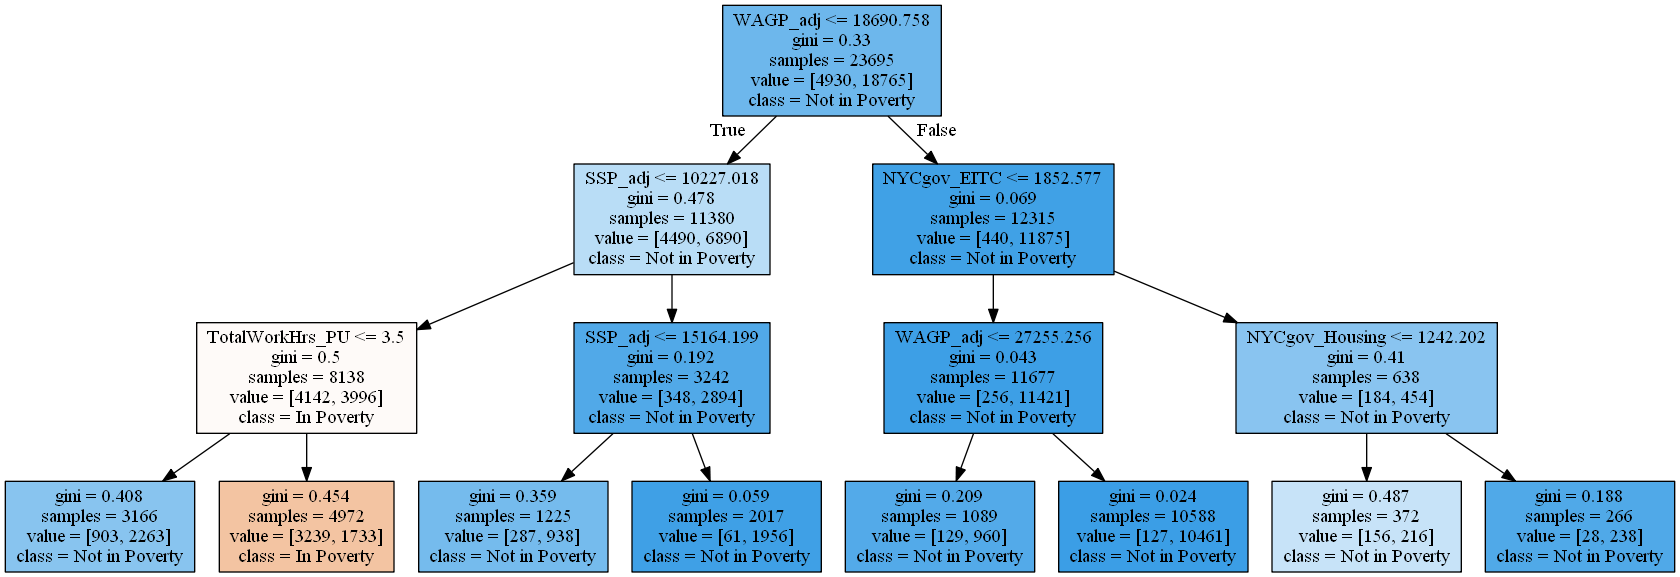

In [36]:
from io import StringIO
dot_data = StringIO()
tree.export_graphviz(unbalanced_clf, out_file=dot_data,feature_names=list(xTrain_unbalanced),
                     class_names=np.vectorize(dictionary.get)(unbalanced_clf.classes_),filled=True)
graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph2.create_png())

### Balancing the train data fitting it to a model

In [23]:
from sklearn.utils import resample
denonpoverty = resample(nonpoverty,replace = False,n_samples = len(poverty),random_state=45)
Train_balanced = pd.concat([poverty,denonpoverty])
print(len(Train_balanced[Train_balanced.NYCgov_Pov_Stat==2])/len(Train_balanced))
print(Train_balanced.shape)

0.5
(9860, 60)


In [24]:
xTrain_balanced=Train_balanced.drop('NYCgov_Pov_Stat',axis=1)
yTrain_balanced=Train_balanced.NYCgov_Pov_Stat
print(xTrain_balanced.shape,yTrain_balanced.shape)


(9860, 59) (9860,)


In [25]:
from sklearn.tree import DecisionTreeClassifier
balclf = DecisionTreeClassifier(max_depth=3)
balclf.fit(xTrain_balanced,yTrain_balanced)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
from sklearn.metrics import confusion_matrix
bal_yPred=balclf.predict(xTest)
confusion_matrix(yTest, bal_yPred, labels=None, sample_weight=None)

array([[1039,  155],
       [1039, 3691]], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score
print("Accuracy on Training set:",accuracy_score(yTrain_balanced,balclf.predict(xTrain_balanced),normalize=True,sample_weight=None))
print(f"Accuracy on Test set: {accuracy_score(yTest, bal_yPred, normalize=True, sample_weight=None)}")

### Prediction and Accuracy was done on the trainig set to compare it against test set to see that our model is not over fitting 

Accuracy on Training set: 0.829411764706
Accuracy on Test set: 0.7984469952734639


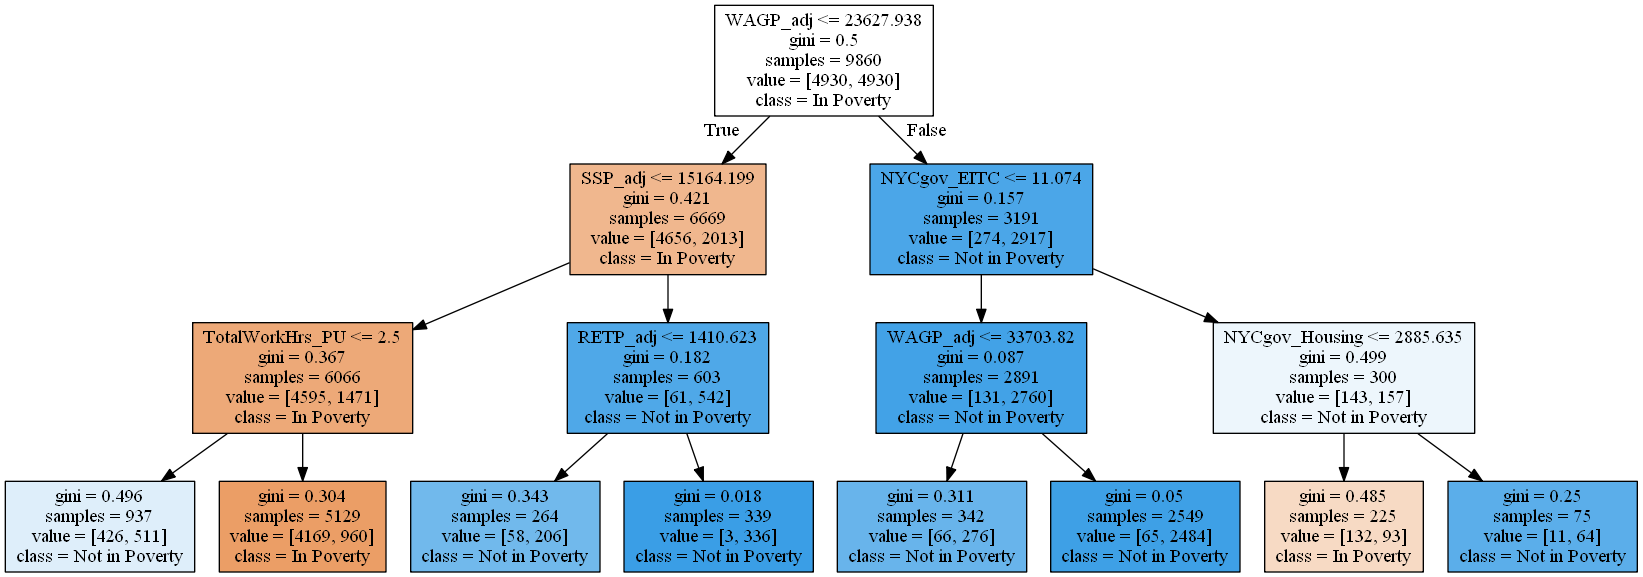

In [34]:
from io import StringIO
dot_data = StringIO()
tree.export_graphviz(balclf, out_file=dot_data,feature_names=list(xTrain_balanced),
                     class_names=np.vectorize(dictionary.get)(balclf.classes_),filled=True)
graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph2.create_png())

In [ ]:
### Feature Importance

In [42]:
def plot_feature_important(model):
    len_features = len(Newdf.columns[:-1])
    plt.barh(np.arange(len_features),model.feature_importances_,align = 'center')
    plt.yticks(np.arange(len_features),Newdf.columns)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1,len_features)

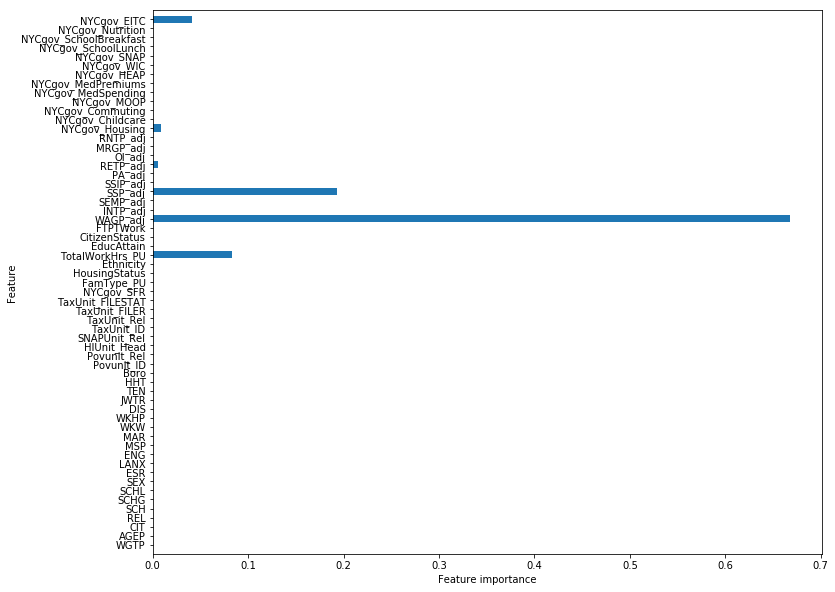

In [43]:
plt.figure(figsize=(12,10))
plot_feature_important(balclf)
plt.show()

# Random Forest

In [44]:
forest = RandomForestClassifier(n_estimators=1000,max_features=8,max_depth=3)
forest.fit(xTrain_balanced,yTrain_balanced)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
from sklearn.metrics import confusion_matrix
forest_yPred=forest.predict(xTest)
confusion_matrix(yTest, forest_yPred, labels=None, sample_weight=None)

array([[1021,  173],
       [ 993, 3737]], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score
print("Accuracy for training set:",accuracy_score(yTrain_balanced,forest.predict(xTrain_balanced),normalize=True,sample_weight=None))
print(f'Accuracy on test set: {accuracy_score(yTest, forest_yPred, normalize=True, sample_weight=None)}')


Accuracy for training set: 0.827687626775
Accuracy on test set: 0.8031735313977042


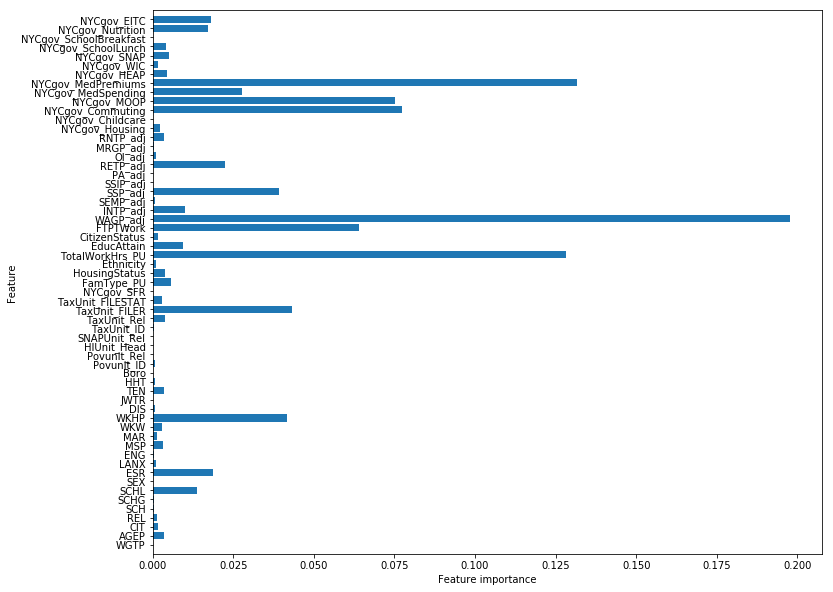

In [47]:
plt.figure(figsize=(12,10))
plot_feature_important(forest)
plt.show()

In [48]:
estimator = forest.estimators_[800]
estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1692578500, splitter='best')

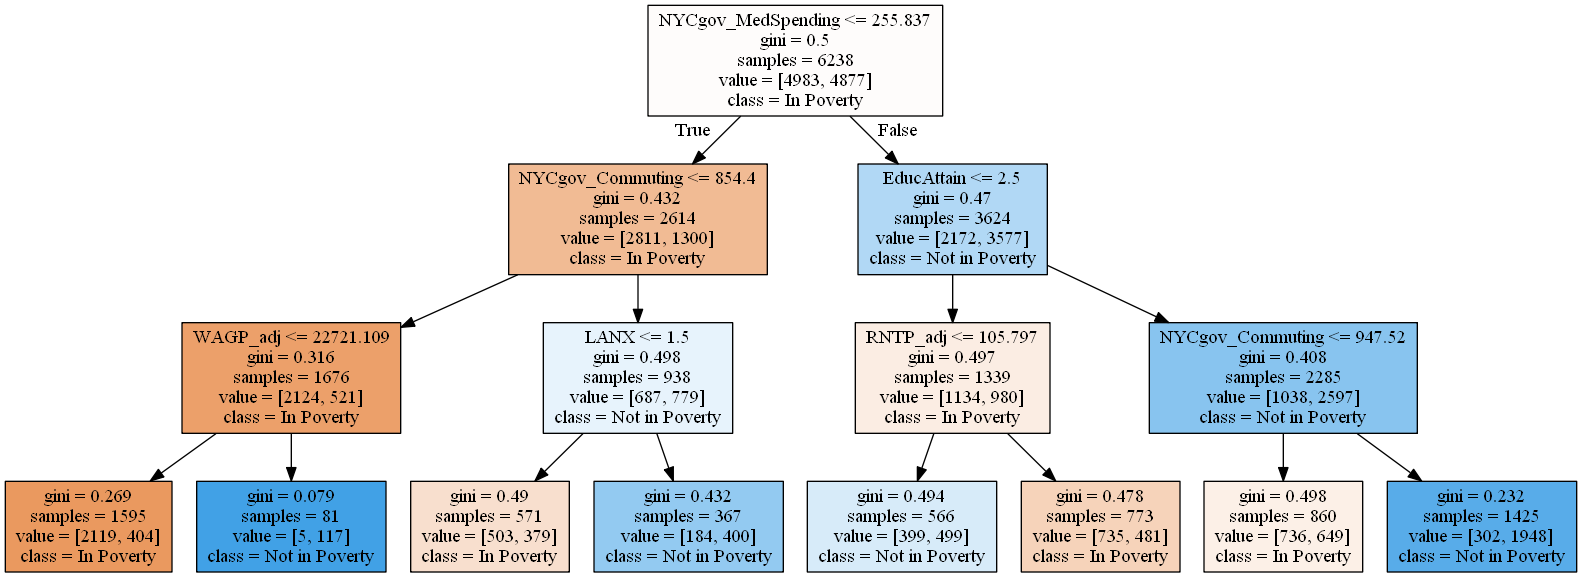

In [49]:
dot_data = StringIO()
tree.export_graphviz(estimator, out_file=dot_data,feature_names=list(xTrain_unbalanced),
                    class_names=np.vectorize(dictionary.get)(balclf.classes_),filled=True)
graph3 = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph3.create_png())